In [12]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob


In [2]:
! pip install --upgrade --force-reinstall --no-deps kaggle


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 58 kB 8.1 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=f9d9ad8f0acac12b3007fa5c535869b07cfec545024d8d89d588ac6751cfda7b
  Stored in directory: /home/jovyan/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [17]:
pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 78 kB 9.3 MB/s             
     |████████████████████████████████| 78 kB 14.4 MB/s            
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
import opendatasets as od

In [19]:
od.download("https://www.kaggle.com/datasets/moltean/fruits")

100%|██████████| 1.28G/1.28G [00:16<00:00, 81.6MB/s]


/usr/local/lib/python3.8/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Traceback (most recent call last):
  File "/home/jovyan/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/jovyan/.local/lib/python3.8/site-packages/kaggle/__init__.py", line 19, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/home/jovyan/.local/lib/python3.8/site-packages/kaggle/api/__init__.py", line 22, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/home/jovyan/.local/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 75, in <module>
    from slugify import slugify
ModuleNotFoundError: No module named 'slugify'


In [22]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/fruits/fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

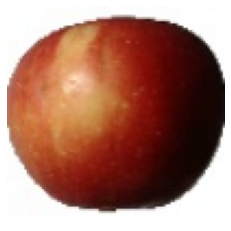

(100, 100, 3)


In [24]:
#Setting Training & Test dir paths
train_path = 'fruits/fruits-360_dataset/fruits-360/Training'
test_path = 'fruits/fruits-360_dataset/fruits-360/Test'
#Displaying the image/content/dataset/fruits-360_dataset/fruits-360/Training/Apple Braeburn/0_100.jpg
img = load_img(train_path + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)
#/content/drive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Training/apple_braeburn

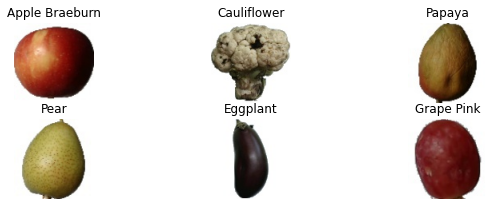

In [25]:
#Visualizing more Images
images = ['Apple Braeburn', 'Cauliflower', 'Papaya', 'Pear', 'Eggplant', 'Grape Pink']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + "/" + images[i] +"/0_100.jpg", target_size=(100,100)))

In [26]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [27]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [28]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [29]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67693 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [30]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/tmp/ipykernel_73/3778154212.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
25/25 [==============================] - 21s 830ms/step - loss: 4.8224 - accuracy: 0.0281 - val_loss: 4.3692 - val_accuracy: 0.0651
Epoch 2/100
25/25 [==============================] - 21s 855ms/step - loss: 4.2141 - accuracy: 0.0669 - val_loss: 3.8854 - val_accuracy: 0.0651
Epoch 3/100
25/25 [==============================] - 21s 830ms/step - loss: 3.6438 - accuracy: 0.1262 - val_loss: 3.0035 - val_accuracy: 0.2448
Epoch 4/100
25/25 [==============================] - 24s 954ms/step - loss: 3.0879 - accuracy: 0.2031 - val_loss: 2.5836 - val_accuracy: 0.2891
Epoch 5/100
25/25 [==============================] - 21s 851ms/step - loss: 2.8207 - accuracy: 0.2488 - val_loss: 2.1219 - val_accuracy: 0.4479
Epoch 6/100
25/25 [==============================] - 21s 830ms/step - loss: 2.3854 - accuracy: 0.3306 - val_loss: 1.7958 - val_accuracy: 0.5221
Epoch 7/100
25/25 [==============================] - 20s 817ms/step - loss: 2.1313 - accuracy: 0.3931 - val_loss: 1.4942 - val_accuracy:

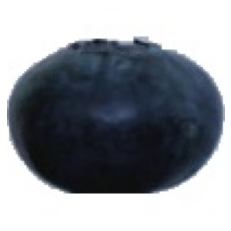

In [31]:
#Displaying the selected image

img = load_img("fruits/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('fruits/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
labels=test_generator.class_indices
key_list = list(labels.keys())
val_list = list(labels.values())
pos= val_list.index(prediction)
print(key_list[pos])

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

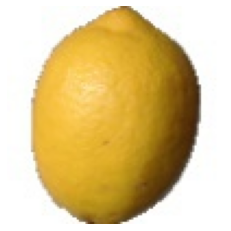

In [32]:
#Displaying the selected image
img2 = load_img("fruits/fruits-360_dataset/fruits-360/Test/Lemon/321_100.jpg", target_size=(100,100))
plt.imshow(img2)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image2 = load('fruits/fruits-360_dataset/fruits-360/Test/Lemon/321_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
#Predicting the class
prediction = (np.argmax(model.predict(image2), axis=-1))
pos= val_list.index(prediction)
print(key_list[pos])

In [ ]:
#Displaying the selected image

# img3 = load_img("/content/dataset/fruits-360_dataset/fruits-360/test-multiple_fruits/apple.jpg", target_size=(100,100))
# plt.imshow(img3)
# plt.axis("off")
# plt.show()
# #Loading the image 
# def load(filename):
#     np_image = Image.open(filename)
#     np_image=np_image.resize((100,100))
#     np_image = np.array(np_image).astype('float32')/255
#     np_image = np.expand_dims(np_image, axis=0)
#     return np_image
# image3 = load("/content/dataset/fruits-360_dataset/fruits-360/test-multiple_fruits/apple.jpg")
# #/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [ ]:
# #Predicting the class
# prediction = (np.argmax(model.predict(image3), axis=-1))
# pos= val_list.index(prediction)
# print(key_list[pos])

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [ ]:
model.save('model.h5')